# Chapter 6 - Parametric Estimation  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
import math

## Example 1 – the number of 911 phone calls in a day

#### Poisson Distribution
Recall that the Poisson distribution takes non-negative integers and has the parameter $\lambda$.

The Probability Mass Function (PMF) is defined as:
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}
$$

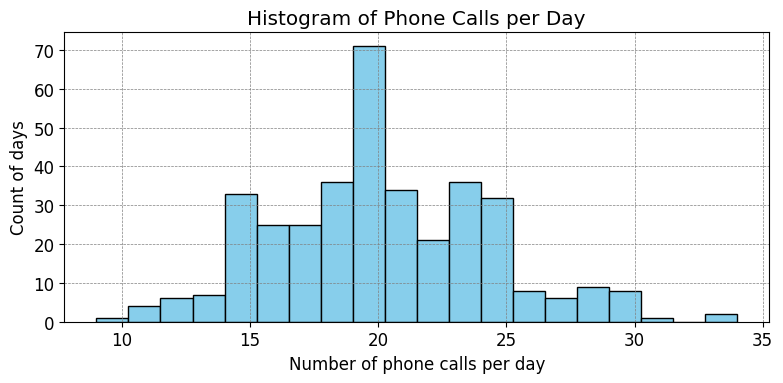

In [5]:
np.random.seed(2020)                                                 # Set a random seed for reproducibility
avg = 20                                                             # Define the lambda parameter (average number of calls per day)
days = 365                                                           # Define the number of days (sample size)

# Generate a random sample of phone call counts per day from a Poisson distribution
calls = np.random.poisson(lam=avg, size=days)

plt.rcParams.update({'font.size': 12})                               # Update font size
plt.figure(figsize=(8, 4))                                           # Set figure size

# Plot a histogram of phone call counts
plt.hist(calls, bins=20, color='skyblue', edgecolor='black')         # Use 20 bins, add color and edge for clarity
plt.xlabel("Number of phone calls per day")                          # Label for x-axis
plt.ylabel("Count of days")                                          # Label for y-axis
plt.title("Histogram of Phone Calls per Day")                        # Title for the plot

plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add gridlines for better readability
plt.tight_layout()                                                   # Adjust layout for better spacing
plt.show();                                                          # Display the histogram

In [6]:
np.mean(calls)

19.98904109589041

The value 19.98904109589041 is the sample mean, calculated from the random sample of 365 days drawn from a Poisson distribution with an expected (theoretical) mean of 20.

## Example 2 – the bounds of uniform distribution

We have a set of points that we assume comes from a uniform distribution. However, we don't know the lower bound, $\alpha$, and upper bound, $\beta$. We aim to estimate these parameters. 

The assumed distribution has a uniform Probability Density Function (PDF) defined on its legitimate domain. The complete form of the distribution is as follows:

$$
P(X = x) = \frac{1}{\beta - \alpha}
$$

The following code snippet generates artificial data with true parameters of $\alpha$ = 0 and $\beta$ = 10:

In [10]:
# Generate artificial data from a uniform distribution with true parameters
np.random.seed(2020)                         # Set random seed for reproducibility
alpha = 0                                    # True lower bound of the uniform distribution
beta = 10                                    # True upper bound of the uniform distribution
data = np.random.uniform(alpha, beta, 2000)  # Generate 2000 random points

# Display the generated data
print(f"Generated data sample: {data[:10]}")

Generated data sample: [9.86276829 8.73391946 5.09745525 2.71835714 3.36918728 2.16954265
 2.76477143 3.43315593 8.62158935 1.5669967 ]


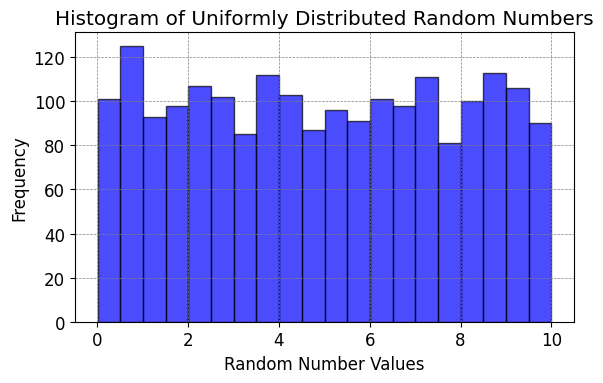

In [11]:
plt.figure(figsize=(6, 4))                                              # Set the figure size

plt.hist(data, edgecolor='black', bins=20, color='blue', alpha=0.7)     # Create a histogram
plt.xlabel("Random Number Values")                                      # Label the x-axis
plt.ylabel("Frequency")                                                 # Label the y-axis
plt.title("Histogram of Uniformly Distributed Random Numbers")          # Add a title
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")     # Add grid lines

plt.tight_layout()                                                      # Adjust layout
plt.show()                                                              # Display the histogram

*Histogram plot of artificial uniform distribution data.*

#### Representation of Moments with Unknown Parameters

Next, we perform the representation of moments with the unknown parameters:

1. First, let's express the first and second moments with the parameters. The first moment is easy as it is the average of $\alpha$ and $\beta$:  

$$
M_1 = 0.5 (\alpha + \beta)
$$

2. The second moment requires some calculation. It is the integration of the product of \(x^2\) and the PDF according to the definition of moments:

$$
M_2 = \int_{\alpha}^{\beta} \frac{x^2}{\beta - \alpha} \, dx = \frac{1}{3} (\alpha^2 + \alpha \beta + \beta^2)
$$

3. The next step is to express the parameters $\alpha$ and $\beta$ using the moments. After solving the two equations for \(M_1\) and \(M_2\), we derive the following formulas:

$$
\alpha = M_1 - \sqrt{3(M_2 - M_1^2)}
$$

$$
\beta = 2M_1 - \alpha
$$







In [14]:
M1 = np.mean(data).round(2)
M2 = np.mean(data**2).round(2)

print(f'M1: {M1}\nM2: {M2}')

M1: 4.95
M2: 33.02


In [15]:
alpha = (M1 - (3*(M2 - M1**2))**0.5).round(2)
beta = (2*M1 - alpha).round(2)

print(f'alpha: {alpha}\nbeta: {beta}')

alpha: -0.1
beta: 10.0


This is
a pretty good estimation since the generation of the random variables has a lower bound
of 0 and an upper bound of 10.

# Applying the Maximum Likelihood Approach with Python

**Maximum Likelihood Estimation (MLE)** is the most widely used estimation method. It
estimates the probability parameters by maximizing a likelihood function. The obtained
extremum estimator is called the **maximum likelihood estimator**. The MLE approach is
both intuitive and flexible. It has the following advantages:

• *MLE is consistent.* This is guaranteed. In many practices, a good MLE means the job that is left is simply to collect more data.

• *MLE is functionally invariant.* The likelihood function can take various transformations before maximizing the functional form. We will see examples in the next section.

• *MLE is efficient.* Efficiency means when the sample size tends to infinity, no other consistent estimator has a lower asymptotic MSE than MLE.

### You toss it 20 times and get 11 heads. Is it more likely to be a fair coin or an unfair coin?

#### Likelihood of Coin Fairness

We want to determine which of the following is more likely to be true:
- $P(11 \text{ heads out of 20 | fair})$
- $P(11 \text{ heads out of 20 | unfair})$

#### Binomial Distribution Likelihoods

##### For a Fair Coin:
$$
L_{\text{fair}} = \binom{20}{11} \left( \frac{1}{2} \right)^{20}
$$
Substituting the values:
$$
L_{\text{fair}} \approx 0.1602
$$

##### For an Unfair Coin (biased toward heads):
$$
L_{\text{unfair}} = \binom{20}{11} \left( \frac{3}{5} \right)^{11} \left( \frac{2}{5} \right)^{9}
$$
Substituting the values:
$$
L_{\text{unfair}} \approx 0.1597
$$

#### Conclusion:
It is slightly more likely that the coin is fair $(L_{\text{fair}} > L_{\text{unfair}}$).

---

#### Observations on Likelihood Functions:
- Likelihood functions do not sum to 1, as they are not legitimate PDFs.
- Likelihood functions evaluate the probability of observing the data under different parameter assumptions.

---

#### Maximizing the Likelihood Function:
To find the value of \(p\) that maximizes the likelihood function \(L(p)\), we remove the combinatorial factor, as it does not depend on \(p\):
$$
L(p) \propto p^{11} (1-p)^9
$$

By analytical or numerical calculation, the value of \(p\) that maximizes \(L(p)\) lies between 0 and 1, with $p = \frac{11}{20}$ being the maximum likelihood estimate.


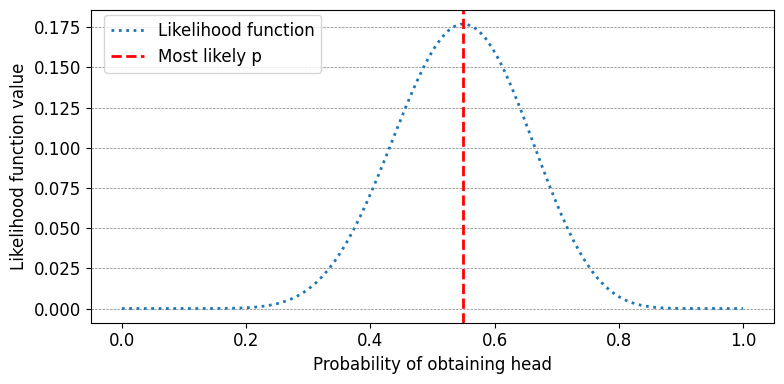

In [21]:
# Calculate the combinatorial factor for the binomial coefficient
factor = math.factorial(20) / math.factorial(11) / math.factorial(9)

P = np.linspace(0, 1, 100)   # Generate an array of probability values from 0 to 1

plt.figure(figsize=(8, 4))  # Set the figure size for better visualization

# Plot the likelihood function for varying probabilities of obtaining heads
plt.plot(
    P,                                              # Probability values (x-axis)
    factor * np.power(P, 11) * np.power(1 - P, 9),  # Binomial likelihood function
    linestyle=":",                                  # Use a dotted line style
    linewidth=2,                                    # Set the width of the line
    label="Likelihood function"                     # Add a label for the legend
)

# Mark the most likely value of p (maximum likelihood estimate) on the plot
plt.axvline(
    0.55,                                    # x-coordinate of the vertical line
    linestyle="--",                          # Use a dashed line style
    linewidth=2,                             # Set the width of the line
    label="Most likely p",                   # Add a label for the legend
    color="r"                                # Set the color to red
)

# Add horizontal gridlines
plt.grid(visible=True, axis='y', linestyle='--', linewidth=0.5, color='grey')  

plt.xlabel("Probability of obtaining head")  # Label the x-axis
plt.ylabel("Likelihood function value")      # Label the y-axis
plt.legend(loc=[0.02, 0.8])                  # Add a legend to the plot

plt.tight_layout()                           # Adjust layout for better spacing
plt.show()                                   # Display the plot

## Maximum Likehood Estimation for modeling noise

In [23]:
# Generation of noise

random.seed(2020)              # Set the random seed for reproducibility of results
X = np.linspace(-10, 10, 100)  # Generate 100 evenly spaced values between -10 and 10

# Generate Y values as a linear relationship with X (slope = 0.4) plus random noise
Y = X * 0.4 + np.array([random.normalvariate(0, 1) for _ in range(100)])  # Noise: normal distribution with mean=0 and standard deviation=1

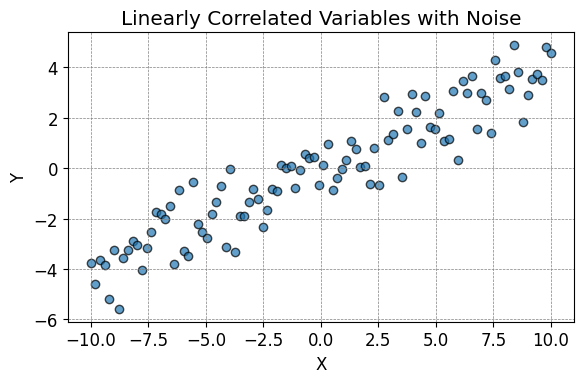

In [24]:
# Plot the scattering of X and Y

plt.figure(figsize=(6, 4))                             # Set the figure size for better readability

plt.scatter(X, Y, alpha=0.7, edgecolor='black')        # Create a scatter plot
plt.xlabel("X")                                        # Label the x-axis as "X"
plt.ylabel("Y")                                        # Label the y-axis as "Y"
plt.title("Linearly Correlated Variables with Noise")  # Add a descriptive title

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')  # Add horizontal and vertical grid lines

plt.tight_layout()                                     # Adjust layout
plt.show();                                            # Display the plot

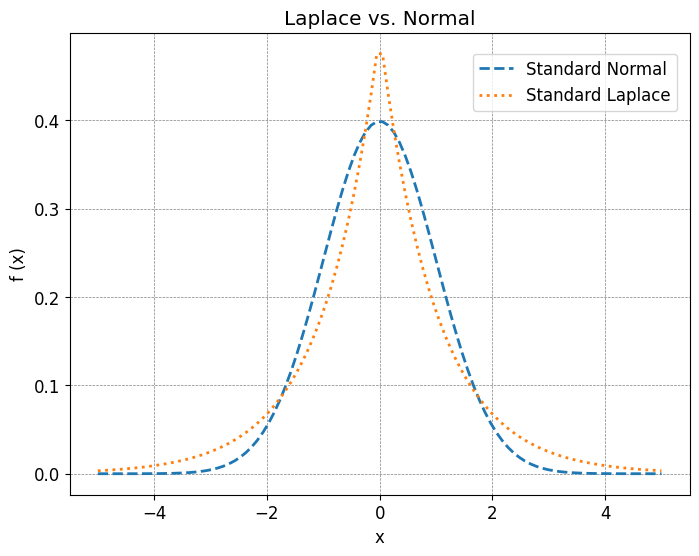

In [25]:
# Define the range of x values
xs = np.linspace(-5, 5, 100)  # Create 100 evenly spaced points between -5 and 5

# Calculate the PDF of the normal distribution for the given x values
normal_variables = 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * xs**2)  # Standard normal distribution formula

# Calculate the PDF of the Laplace distribution for the given x values
laplace_variables = 0.5 * np.exp(-np.abs(xs))                     # Laplace distribution formula with scale parameter 1

plt.figure(figsize=(8, 6))   # Set the figure size

# Plot the standard normal distribution
plt.plot(
    xs,                          # X points
    normal_variables,            # Standard Normal
    label="Standard Normal",     # Add a label for the legend
    linestyle="--",              # Use a dashed line style
    linewidth=2                  # Set line width
)

# Plot the standard Laplace distribution
plt.plot(
    xs,                          # X points
    laplace_variables,           # Standard Laplace 
    label="Standard Laplace",    # Add a label for the legend
    linestyle=":",               # Use a dotted line style
    linewidth=2                  # Set line width
)

plt.xlabel("x")                  # Label the x-axis as "X"
plt.ylabel("f (x)")              # Label the y-axis as "Y"
plt.title("Laplace vs. Normal")  # Add a descriptive title

plt.rcParams.update({'font.size': 12})                               # Set font size
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')  # Add horizontal and vertical grid lines
plt.legend(loc=[0.65, 0.83]);                                        # Position the legend

*Standard normal and standard Laplace distribution around 0.*

Results under the normal distribution noise assumption:

In [28]:
k_1 = np.sum(X*Y)/np.sum(X*X)
print("K1:",k_1)

K1: 0.40410242120384987


Let's visualize it to check how well this estimation does. The following code snippet adds
the estimated y values to the original scatter plot as a dashed bold line:

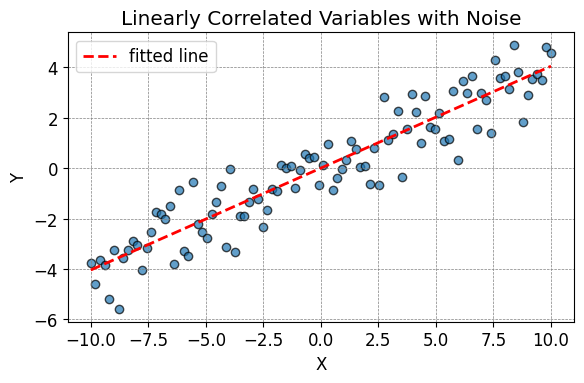

In [30]:
# Plot the scattering of X and Y

plt.figure(figsize=(6, 4))                             # Set the figure size for better readability

plt.scatter(X, Y, alpha=0.7, edgecolor='black')        # Create a scatter plot
plt.xlabel("X")                                        # Label the x-axis as "X"
plt.ylabel("Y")                                        # Label the y-axis as "Y"
plt.title("Linearly Correlated Variables with Noise")  # Add a descriptive title

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey')         # Add horizontal and vertical grid lines
plt.plot(X, X*k_1, linewidth=2, linestyle="--", c="r", label="fitted line") # Add estimated value as angular coefficient
plt.legend()                                                                # Add legend for fitted line

plt.tight_layout()                                     # Adjust layout
plt.show();                                            # Display the plot

Visualization of log-likelihood function and the derivative for various k values.

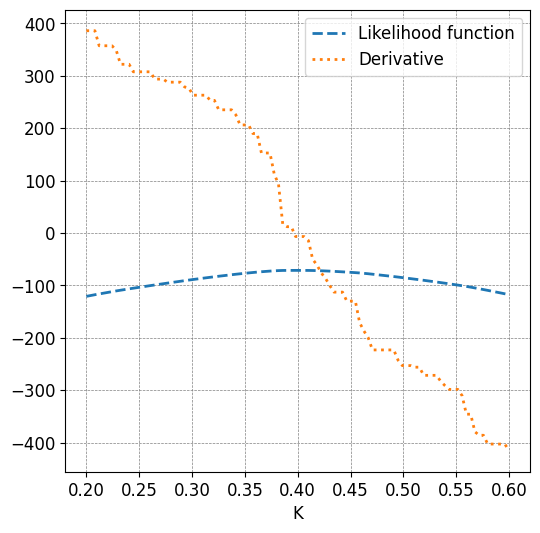

In [32]:
Ks = np.linspace(0.2, 0.6, 100)            # Generate an array of K values ranging from 0.2 to 0.6 with 100 points

# Define a function to calculate the log-likelihood
def cal_log_likelihood(X, Y, k):
    return -np.sum(np.abs(Y - k * X))      # Compute the negative sum of the absolute differences between Y and k*X

# Define a function to calculate the derivative of the log-likelihood
def cal_derivative(X, Y, k):
    return np.sum(X * np.sign(Y - k * X))  # Compute the derivative using the sign of the differences


Likelihoods = [cal_log_likelihood(X, Y, k) for k in Ks]  # Compute the log-likelihoods for all K values
Derivatives = [cal_derivative(X, Y, k) for k in Ks]      # Compute the derivatives for all K values

plt.figure(figsize=(6, 6))                               # Set the figure size to 6x6 inches

# Plot the log-likelihood function
plt.plot(Ks,Likelihoods,label="Likelihood function",linestyle="--",linewidth=2)

# Plot the derivative function
plt.plot(Ks,Derivatives,label="Derivative",linestyle=":",linewidth=2)

plt.grid(visible=True, linestyle='--', linewidth=0.5, color='grey') # Add a grid to the plot
plt.legend()                                                        # Add a legend to differentiate between the two plots
plt.xlabel("K");                                                    # Label the x-axis as 'K'

The graph shows the **likelihood function** and its **derivative** with respect to the parameter \( K \).

#### **Likelihood Function (Dashed Line)**
- The **likelihood function** describes how likely the given data \( X \) and \( Y \) are under various values of \( K \).
- It reaches a *maximum* around \( K = 0.4 \). At this point, the likelihood function achieves its optimal value.
- This maximum value indicates the most likely value of \( K \) that fits the data under the defined likelihood model.

#### **Derivative (Dotted Line)**
- The **derivative** measures the rate of change of the likelihood function with respect to \( K \).
- The derivative crosses **zero** near \( K = 0.4 \), which corresponds to the maximum of the likelihood function.
- On the left of \( K = 0.4 \), the derivative is positive, meaning the likelihood is increasing.
- On the right of \( K = 0.4 \), the derivative is negative, meaning the likelihood is decreasing.

#### **Key Insight:**
- The point where the derivative equals **zero** (near \( K = 0.4 \)) is the **critical point** and corresponds to the maximum of the likelihood function.
- This behavior aligns with the principle of optimization where the derivative of a function is zero at its maximum or minimum. Here, it’s a **maximum** because the likelihood function peaks at that point.


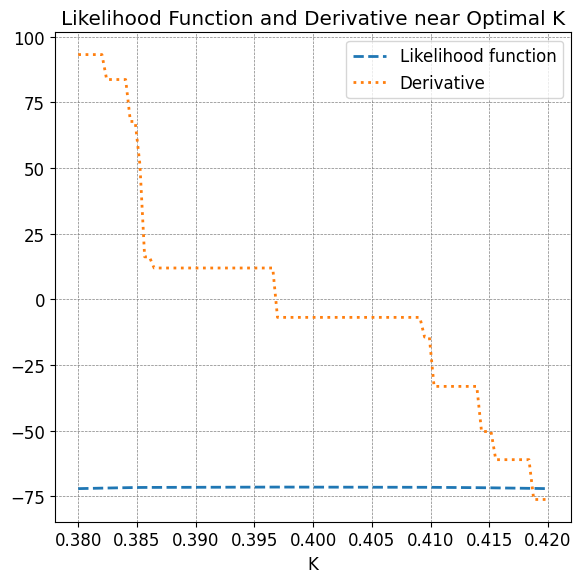

In [34]:
# Generate a finer range of K values between 0.38 and 0.42
Ks = np.linspace(0.38, 0.42, 100)

# Compute likelihood and derivative for each K
Likelihoods = [cal_log_likelihood(X, Y, k) for k in Ks]  # Calculate likelihoods
Derivatives = [cal_derivative(X, Y, k) for k in Ks]      # Calculate derivatives

# Create the plot
plt.figure(figsize=(6, 6))                               # Set the figure size
plt.plot(Ks, Likelihoods, label="Likelihood function",   # Plot the likelihood function
         linestyle="--", linewidth=2)                    
plt.plot(Ks, Derivatives, label="Derivative",            # Plot the derivative of the likelihood function
         linestyle=":", linewidth=2)

# Add labels and legend
plt.legend()                                             # Add legend for the plot
plt.xlabel("K")                                          # Label the x-axis
plt.title("Likelihood Function and Derivative near Optimal K")  # Add a title

plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid lines
plt.tight_layout()                                       # Adjust layout to prevent overlap
plt.show();                                              # Display the plot

This strange behavior comes from the fact that taking the derivative of the absolute value
function lost information about the value itself. We only have information about the sign
of the value left. However, we can still obtain an estimation of the optimal value by using
the `numpy.argmax` function. This function returns the index of the maximal value in
an array. We can then use this index to index the array for our k values. The following
one-line code snippet does the job:

In [36]:
k_2 = Ks[np.argmax(Likelihoods)]
k_2

0.396969696969697

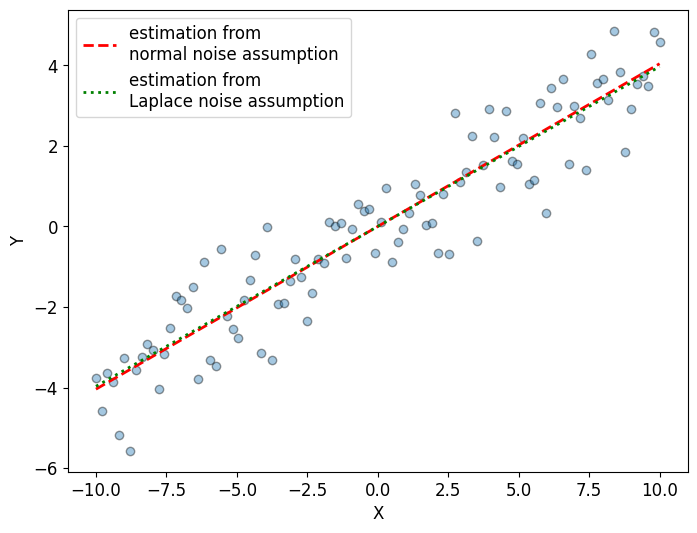

In [37]:
# Plot both estimation together

plt.figure(figsize=(8,6))
plt.scatter(X,Y,alpha = 0.4, edgecolor='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X,X*k_1,linewidth=2,linestyle="--",c="r", label="estimation from \nnormal noise assumption")
plt.plot(X,X*k_2,linewidth=2,linestyle=":",c="g", label="estimation from \nLaplace noise assumption")
plt.legend();

*Estimations of the coefficient of proportionality.*

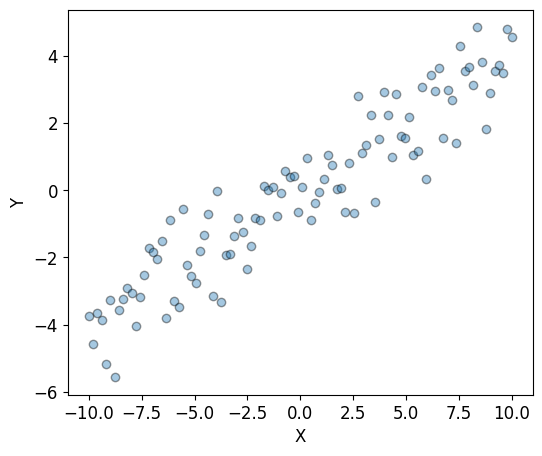

In [39]:
# It is indeed generated from the normal distribution:

random.seed(2020)
X = np.linspace(-10,10,100)
Y = X * 0.4 + np.array([random.normalvariate(0,1) for _ in range(100)])

plt.figure(figsize=(6,5))
plt.scatter(X,Y,alpha = 0.4, edgecolor='black')
plt.xlabel("X")
plt.ylabel("Y");

## Monty Hall Problem

You are on a show to win a prize. There is a huge prize behind one of three doors. Now,
you pick door A: the host opens door B and finds it empty. You are offered a second
chance to switch to door C or stick to door A, what should you do? The prior probability
for each door, A, B, or C, is 𝑃(𝐴) = 𝑃(𝐵) = 𝑃(𝐶) = 1/3. The host will always try to open an
empty door after you select: if you selected a door without the prize, the host will open
another empty door. If you select the door with the prize, the host will open one of the
remaining doors randomly.

In [42]:
random.seed(2020)                               # Set the random seed for reproducibility
doors = ["A", "B", "C"]                         # Define the three doors as options
count, stick, switch = 0, 0, 0                  # Initialize counters for experiments, sticking, and switching
trials = []                                     # List to store the number of attempts before a reveal

# Run 10,000 experiments to simulate the Monty Hall problem
for i in range(10000):                          
    prize = random.choice(doors)                # Randomly assign the prize behind one of the doors
    pick = random.choice(doors)                 # Player randomly picks one of the doors
    reveal = random.choice(doors)               # Host randomly chooses a door to reveal

    trial = 1                                   # Initialize the trial counter for the current experiment
    # Ensure the revealed door is not the prize door or the player's pick
    while reveal == prize or reveal == pick:    
        reveal = random.choice(doors)           # Randomly choose again until valid
        trial += 1                              # Increment the trial count
    
    trials.append(trial)                        # Record the number of attempts needed to reveal

    # Check the outcome of the experiment
    if reveal != pick and reveal != prize:      # If the revealed door is valid and unrelated to pick/prize
        count += 1                              # Increment the total experiment count
        if pick == prize:                       # If the player sticks and wins
            stick += 1                          # Increment the 'stick' counter
        else:                                   # If the player switches and wins
            switch += 1                         # Increment the 'switch' counter

# Print the results of the experiment
print("Total experiment: {}".format(count))     # Total number of valid experiments
print(" Times of switch:  {}".format(switch))   # Number of times switching wins
print("  Times of stick:  {}".format(stick))    # Number of times sticking wins

Total experiment: 10000
 Times of switch:  6597
  Times of stick:  3403


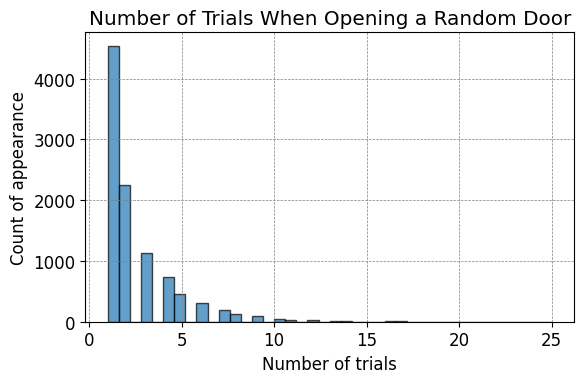

In [43]:
plt.figure(figsize=(6, 4))    # Set the figure size

# Plot a histogram of the trials data with 40 bins
plt.hist(
    trials,                   # Data to plot (number of trials)
    bins=40,                  # Number of bins for the histogram
    edgecolor="black",        # Add black edges to the bars for clarity
    alpha=0.7                 # Set transparency for better visibility
)

plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a horizontal grid

plt.xlabel("Number of trials")                           # Label the x-axis to indicate the number of trials
plt.ylabel("Count of appearance")                        # Label the y-axis to indicate the count of occurrences
plt.title("Number of Trials When Opening a Random Door") # Add a title

plt.tight_layout()            # Adjust layout 
plt.show()                    # Display the histogram

This histogram represents the distribution of the number of trials required to randomly open a door that does not reveal the prize in a Monty Hall-like simulation. The simulation confirms that most trials require very few attempts (1 or 2) to randomly find a valid door. The graph demonstrates the skewed distribution: it is heavily concentrated on the lower end of the trial count, with very few cases requiring a larger number of attempts.

In our plain simulation, in order to meet the condition that the host wants to satisfy, we
must do random selection more than one time, and sometimes even more than 10 times.
This is where the bizarreness hides.